In [4]:
!pip install --upgrade datasets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.8/494.8 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 14.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-nvrtc-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-nvrtc-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-runtime-cu12==12.4.127; platform_system == "Linux" and platform_

In [13]:
# Read datasets.
from datasets import load_dataset

dataset = load_dataset("ag_news")
train_dataset = dataset["train"]["text"]
test_dataset = dataset["test"]["text"]


120000


In [15]:
train_dataset_str = ' '.join(train_dataset)
test_dataset_str = ' '.join(test_dataset)
print(train_dataset_str[:1000])
print(len(train_dataset_str)) #28497302
train_dataset_str = train_dataset_str[:10000]
test_dataset_str = test_dataset_str[:1000]
print(len(train_dataset_str)) #10000

Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again. Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market. Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums. Iraq Halts Oil Exports from Main Southern Pipeline (Reuters) Reuters - Authorities have halted oil export\flows from the main pipeline in southern Iraq after\intelligence showed a rebel militia could strike\infrastructure, an oil official said on Saturday. Oil prices soar to all-time record, posing new menace to US economy (AFP) AFP - Tearaway world oil

In [16]:
import tiktoken
import unicodedata
from collections import OrderedDict

# Load the tokenizer for GPT-4, GPT-3.5, and GPT-4o
enc = tiktoken.get_encoding("cl100k_base")

# Encode text into tokens
tokens = enc.encode("ChatGPT is amazing!")
print(tokens)  # list of token IDs

# Decode tokens back to text
text = enc.decode(tokens)
print(text)  # 'ChatGPT is amazing!'

token_id_map_global = {}

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFD', input_str)
    return ''.join([c for c in nfkd_form if not unicodedata.combining(c)])

def convert_tokens_to_ids(input_string, data_set):
  global token_id_map_global
  global vocab_size
  # if token not in token2id:
  #   return token2id['<unk>']
  input_string = input_string.lower()
  input_string = remove_accents(input_string)
  tokens = enc.encode(input_string)
  if data_set == 'train':
    unique_tokens = list(OrderedDict.fromkeys(tokens))
    vocab_size = len(unique_tokens)
    # Build mapping: original tiktoken ID → new compact ID
    token_id_map_global = {orig_id: new_id for new_id, orig_id in enumerate(unique_tokens)}
  remapped = [token_id_map_global.get(t, 0) for t in tokens]
  return remapped

def convert_ids_to_tokens(ids):
  # if id not in id2token:
  #   return '<unk>'
  return enc.decode(ids)


# vocab_size = enc.n_vocab
# print(vocab_size) #100277
# print(len(set((convert_tokens_to_ids(train_dataset_str, 'train')))))
# print(len(set((convert_tokens_to_ids(test_dataset_str, 'test')))))
# # print(len(set(convert_tokens_to_ids(test_dataset_str)) - set(convert_tokens_to_ids(train_dataset_str))))
# # print(max(convert_tokens_to_ids(train_dataset_str)))
# print(vocab_size)

[16047, 38, 2898, 374, 8056, 0]
ChatGPT is amazing!


In [17]:
tokens_to_skip = 100
import random

def pick_random_tokens(tokens):
  return [token for token in random.sample(tokens, 5)]

def generate_model_input(dataset, data_type):
  rows = []
  tokens = convert_tokens_to_ids(dataset, data_type)
  print(tokens)
  for i in range(0, len(tokens)-5+1, tokens_to_skip):
    context = tokens[i:i+2] + tokens[i+3:i+5]
    # Process and convert to id.
    target = tokens[i+2]
    negatives = pick_random_tokens(tokens)
    rows.append((context, target, negatives))

  print(rows[:10])
  return rows

x = generate_model_input(train_dataset_str, 'train')
random.shuffle(x)
split_index = int(len(x) * 0.9)
train_x = x[:split_index]
val_x = x[split_index:]
test_x = generate_model_input(test_dataset_str, 'test')



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 11, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 18, 31, 32, 33, 34, 2, 35, 36, 37, 38, 39, 40, 41, 9, 10, 11, 12, 13, 11, 14, 42, 43, 44, 35, 36, 37, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 24, 58, 59, 60, 61, 62, 7, 63, 64, 18, 48, 65, 66, 24, 67, 68, 69, 70, 71, 26, 7, 72, 2, 73, 56, 74, 75, 76, 77, 78, 9, 10, 11, 12, 13, 11, 14, 79, 80, 81, 82, 83, 24, 84, 7, 74, 56, 7, 78, 51, 85, 31, 86, 87, 24, 88, 89, 7, 90, 72, 91, 92, 93, 7, 94, 26, 7, 24, 95, 96, 97, 98, 99, 2, 100, 101, 102, 103, 73, 104, 105, 106, 107, 108, 9, 10, 11, 12, 13, 11, 14, 109, 110, 111, 73, 112, 24, 113, 105, 7, 106, 108, 62, 107, 100, 101, 114, 24, 115, 116, 49, 117, 118, 119, 120, 24, 121, 122, 18, 123, 73, 124, 125, 69, 126, 127, 2, 73, 81, 128, 87, 129, 130, 131, 18, 132, 133, 134, 87, 135, 74, 9, 136, 137, 12, 138, 137, 14, 139, 140, 141, 73, 81, 18, 142, 143, 144, 56, 145, 146, 147, 18, 148, 49, 133, 149, 134, 150, 151, 152,

In [18]:
from torch.utils.data import Dataset

class TokenDataset(Dataset):
    def __init__(self, data):
        self.data = data  # list of (context_list, target_id)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        context, positive, negatives = self.data[idx]
        context_tensor = torch.tensor(context, dtype=torch.long)
        positive_tensor = torch.tensor(positive, dtype=torch.long)
        negatives_tensor = torch.tensor(negatives, dtype=torch.long)
        return context_tensor, positive_tensor, negatives_tensor

Epoch 0: Train Loss: 7.023711204528809 Val Loss: 6.762546062469482
Epoch 1: Train Loss: 7.006006240844727 Val Loss: 6.762587070465088
Epoch 2: Train Loss: 6.988309383392334 Val Loss: 6.762620449066162
Epoch 3: Train Loss: 6.970618724822998 Val Loss: 6.762648105621338
Epoch 4: Train Loss: 6.952932834625244 Val Loss: 6.762673854827881
Epoch 5: Train Loss: 6.9352521896362305 Val Loss: 6.762697696685791
Epoch 6: Train Loss: 6.917575836181641 Val Loss: 6.762720584869385
Epoch 7: Train Loss: 6.899901390075684 Val Loss: 6.76274299621582
Epoch 8: Train Loss: 6.882229328155518 Val Loss: 6.762763977050781
Epoch 9: Train Loss: 6.864559173583984 Val Loss: 6.762784481048584
Epoch 10: Train Loss: 6.846888542175293 Val Loss: 6.7628045082092285
Epoch 11: Train Loss: 6.829216480255127 Val Loss: 6.762826442718506
Epoch 12: Train Loss: 6.8115434646606445 Val Loss: 6.762848377227783
Epoch 13: Train Loss: 6.793867588043213 Val Loss: 6.762872695922852
Epoch 14: Train Loss: 6.776187419891357 Val Loss: 6.7628

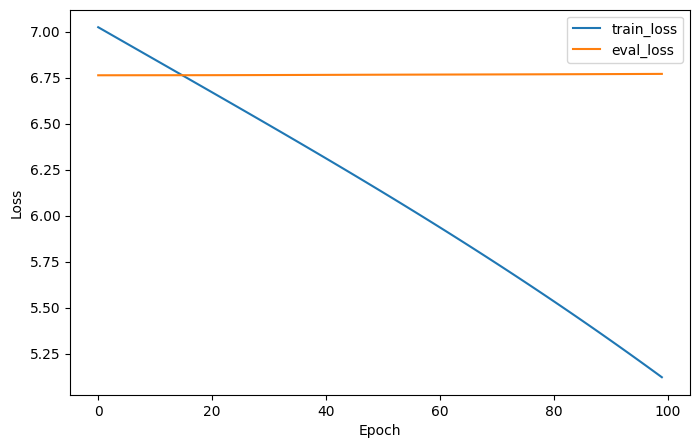

In [24]:
from random import shuffle
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

batch_size = 2048
context_len = 4
embedding_dim = 25
lr = 0.001
epochs = 100


class Word2VecModel(torch.nn.Module):
    def __init__(self, context_size, embedding_dim):
        super(Word2VecModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim) # 64 * embedding_dim
        self.model = nn.Sequential(
            nn.Linear(embedding_dim, vocab_size)
        )

    def forward(self, x):
        embeds = self.embedding(x) # embeds = 64 * 4 * embedding_dim
        avg_embeds = embeds.mean(dim=1) # embeds = 64 * embedding_dim
        return self.model(avg_embeds) # 64 * vocab_size

try:
  train_dataloader = torch.utils.data.DataLoader(TokenDataset(train_x), batch_size=batch_size, shuffle=True)
  val_dataloader = torch.utils.data.DataLoader(TokenDataset(val_x), batch_size=batch_size, shuffle=True)

  model = Word2VecModel(context_len, embedding_dim)
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  criterion = nn.CrossEntropyLoss()

  train_losses=[]
  val_losses=[]
  for i in range(epochs):
    train_loss=0
    model.train()
    for (context, target, negatives) in train_dataloader:
      optimizer.zero_grad()
      preds = model(context)
      loss = criterion(preds, target)
      loss.backward()
      optimizer.step()
      train_loss+=loss.item()
    train_losses.append(train_loss/len(train_dataloader))

    model.eval()
    val_loss=0
    with torch.no_grad():
      for (context, target, negatives) in val_dataloader:
        preds = model(context)
        loss = criterion(preds, target)
        val_loss+=loss.item()
    print(f"Epoch {i}: Train Loss: {train_loss/len(train_dataloader)} Val Loss: {val_loss/len(val_dataloader)}")
    val_losses.append(val_loss/len(val_dataloader))
except Exception as e:
  print(e)


def plot_losses(train_losses, val_losses):
  plt.figure(figsize=(8, 5))
  plt.plot(train_losses, label='train_loss')
  plt.plot(val_losses, label='eval_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
plot_losses(train_losses, val_losses)


In [25]:
# Evaluation
# Compute precision.

def calculate_precision(dataset):
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
  correct_labels = 0
  with torch.no_grad():
    # print(dataloader)
    for (context, target, negatives) in dataloader:
        preds = model(context)
        # print(preds.shape)
        preds = torch.argmax(preds, dim=1)
        # print(preds.shape)
        # print(target.shape)
        correct_labels += sum(int(t.item()) == int(p.item()) for t, p in zip(target, preds))/len(target)
  return correct_labels/len(dataloader)

print('Train precision', calculate_precision(TokenDataset(train_x)))
print('Val precision', calculate_precision(TokenDataset(val_x)))
print('Test precision', calculate_precision(TokenDataset(test_x)))

# Train precision 0.3603989825581395
# Val precision 0.0933990036231884
# Test precision 0.10546875

# Train precision 0.09443577607640107
# Val precision 0.09170608108108108
# Test precision 0.09745238329399424

#  Batch 2048
# Train precision 0.020413914066257817
# Val precision 0.020658735795454547
# Test precision 0.016394776028067885

Train precision 0.7894736842105263
Val precision 0.0
Test precision 0.0


Epoch 0: Train Loss: 1.358466625213623 Val Loss: 1.409040093421936
Epoch 1: Train Loss: 1.3570297956466675 Val Loss: 1.4090523719787598
Epoch 2: Train Loss: 1.3555948734283447 Val Loss: 1.4090648889541626
Epoch 3: Train Loss: 1.3541616201400757 Val Loss: 1.4090782403945923
Epoch 4: Train Loss: 1.352730393409729 Val Loss: 1.409092903137207
Epoch 5: Train Loss: 1.351300835609436 Val Loss: 1.4091085195541382
Epoch 6: Train Loss: 1.349873423576355 Val Loss: 1.4091249704360962
Epoch 7: Train Loss: 1.3484476804733276 Val Loss: 1.4091421365737915
Epoch 8: Train Loss: 1.3470240831375122 Val Loss: 1.4091600179672241
Epoch 9: Train Loss: 1.3456023931503296 Val Loss: 1.4091781377792358
Epoch 10: Train Loss: 1.3441827297210693 Val Loss: 1.4091967344284058
Epoch 11: Train Loss: 1.342764973640442 Val Loss: 1.4092155694961548
Epoch 12: Train Loss: 1.3413496017456055 Val Loss: 1.4092350006103516
Epoch 13: Train Loss: 1.3399362564086914 Val Loss: 1.409254550933838
Epoch 14: Train Loss: 1.33852505683898

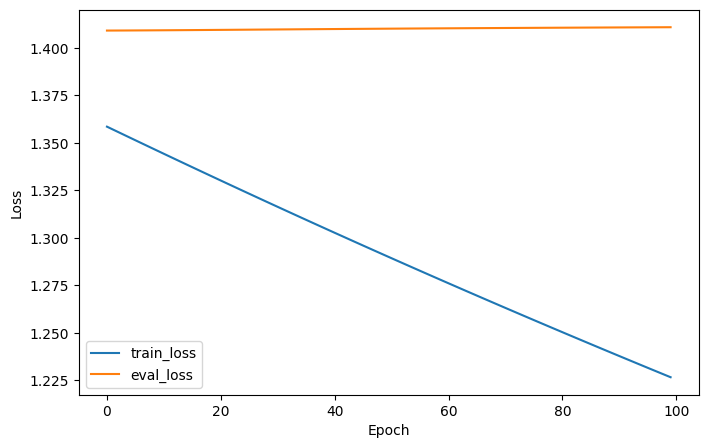

In [44]:
# Two tower model.

from random import shuffle
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

batch_size = 2048
context_len = 4
embedding_dim = 25
lr = 0.001
epochs = 100

class Word2VecModelTwoTower(torch.nn.Module):
    def __init__(self, context_size, embedding_dim):
        super(Word2VecModelTwoTower, self).__init__()
        self.context_embedding_model = nn.Sequential(
            nn.Embedding(vocab_size, embedding_dim) # B * 4 * embedding_dim
        )
        self.word_embedding_model = nn.Sequential( nn.Embedding(vocab_size, embedding_dim)) # B * embedding_dim

    def forward(self, context, positive, negatives):
        # Create context embedding.
        context_embeds = self.context_embedding_model(context) # B * context_size * embedding_dim
        context_embeds = context_embeds.mean(dim=1) # B * embedding_dim

        positive_embeds = self.word_embedding_model(positive) # B * embedding_dim
        negatives_embeds = self.word_embedding_model(negatives) # B * #negatives * embedding_dim

        context_embeds = F.normalize(context_embeds, p=2, dim=1)
        positive_embeds = F.normalize(positive_embeds, p=2, dim=1)
        negatives_embeds = F.normalize(negatives_embeds, p=2, dim=2)

        pos_score = torch.sum(positive_embeds * context_embeds, dim=1) # (B * embedding_dim) * (B * embedding_dim) =  B
        neg_score = torch.bmm(negatives_embeds, context_embeds.unsqueeze(2)).squeeze(2) ## (B * N * embedding_dim) * (B * embedding_dim * 1) = B * N

        pos_loss = F.logsigmoid(pos_score)
        neg_loss = F.logsigmoid(-neg_score).mean(dim=1)

        return - (pos_loss + neg_loss).mean()

    def get_word_embeddings(self, token):

        return self.word_embedding_model(token)

    def get_all_word_embeddings(self):
        return self.word_embedding_model[0].weight.data

    def get_context_embeddings(self, context):
        embed =  self.context_embedding_model(context)
        return embed.mean(dim=1);

try:
  train_dataloader = torch.utils.data.DataLoader(TokenDataset(train_x), batch_size=batch_size, shuffle=True)
  val_dataloader = torch.utils.data.DataLoader(TokenDataset(val_x), batch_size=batch_size, shuffle=True)

  model = Word2VecModelTwoTower(context_len, embedding_dim)
  optimizer = torch.optim.Adam(model.parameters(), lr=lr)
  criterion = nn.CrossEntropyLoss()

  train_losses=[]
  val_losses=[]
  for i in range(epochs):
    train_loss=0
    model.train()
    for (context, positive, negatives) in train_dataloader:
      optimizer.zero_grad()
      loss = model(context, positive, negatives)
      # print("preds", preds.shape)
      # print("target", target.shape)
      # loss = criterion(preds, target)
      loss.backward()
      optimizer.step()
      train_loss+=loss.item()
    train_losses.append(train_loss/len(train_dataloader))

    model.eval()
    val_loss=0
    with torch.no_grad():
      for (context, positive, negatives) in val_dataloader:
        loss = model(context, positive, negatives)
        val_loss+=loss.item()
    print(f"Epoch {i}: Train Loss: {train_loss/len(train_dataloader)} Val Loss: {val_loss/len(val_dataloader)}")
    val_losses.append(val_loss/len(val_dataloader))
except Exception as e:
  print(e)

def plot_losses(train_losses, val_losses):
  plt.figure(figsize=(8, 5))
  plt.plot(train_losses, label='train_loss')
  plt.plot(val_losses, label='eval_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
plot_losses(train_losses, val_losses)


# torch.save(model, '/content/drive/MyDrive/models/full_word2vec_model.pth')

# model = torch.load('/content/drive/MyDrive/full_word2vec_model.pth')

# Epoch 0: Train Loss: 9.06789674426234 Val Loss: 8.547160357236862
# Epoch 1: Train Loss: 7.7784698042758675 Val Loss: 7.846964160601298
# Epoch 2: Train Loss: 6.753841448939124 Val Loss: 7.311199476321538
# Epoch 3: Train Loss: 5.896664729229239 Val Loss: 6.864484081665675
# Epoch 4: Train Loss: 5.171488867249599 Val Loss: 6.500809093316396


In [29]:
pip install faiss-cpu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 70.1 MB/s eta 0:00:00


In [45]:
import faiss
import torch
import numpy as np

# Example: assume you have learned word embeddings
# embeddings: torch.Tensor of shape [vocab_size, embedding_dim]
# ids: List or array of vocab IDs (0 to vocab_size - 1)

# Random embeddings (replace with your learned embeddings)
embeddings = model.get_all_word_embeddings()
embeddings = torch.nn.functional.normalize(embeddings, p=2, dim=1)  # Normalize for cosine similarity

# Convert to numpy (FAISS requires float32)
embedding_matrix = embeddings.cpu().numpy().astype(np.float32)

# Initialize FAISS index for L2 or cosine similarity
index = faiss.IndexFlatIP(embedding_dim)  # Inner product (use with normalized vectors for cosine)

# Optional: map vector to ID
index = faiss.IndexIDMap(index)

# Add embeddings with associated IDs
ids = np.arange(vocab_size).astype(np.int64)
index.reset()
index.add_with_ids(embedding_matrix, ids)

# Example: Query with one vector
query_vector = embeddings[422].unsqueeze(0).numpy()  # shape: [1, embedding_dim]
D, I = index.search(query_vector, k=5)  # get top-5 closest
print(query_vector.shape)
print("Closest IDs:", I[0])
print("Similarity scores:", D[0])


(1, 25)
Closest IDs: [422 112 946 540 249]
Similarity scores: [1.        0.6338546 0.6286181 0.5988828 0.5391798]


In [49]:
# Evaluation
# Compute precision.

def calculate_precision(dataset):
  dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
  correct_labels = 0
  count=0
  with torch.no_grad():
    for (context, positive, negatives) in dataloader:
        target=positive
        context_embeddings = model.get_context_embeddings(context) # B * embed
        context_embeddings = F.normalize(context_embeddings, p=2, dim=1)
        context_embeddings = context_embeddings.detach().cpu().numpy().astype("float32")
        D, I = index.search(context_embeddings, k=100)
        correct_labels += sum(int(t.item() in p) for t, p in zip(target, I))
        count+=len(target)
  return correct_labels/count

print('Train precision', calculate_precision(TokenDataset(train_x)))
print('Val precision', calculate_precision(TokenDataset(val_x)))
print('Test precision', calculate_precision(TokenDataset(test_x)))

# Train precision 4.815651362251458e-06
# Val precision 0.0
# Test precision 9.856800403734545e-07

# Train precision 0.0012328067487363732
# Val precision 0.0
# Test precision 0.00025233409033560434

Train precision 0.5263157894736842
Val precision 0.0
Test precision 0.3333333333333333
